#**M2 Iris Data Set**

This is perhaps the most famous data set in machine learning. It features 50 instances of each of three types of iris - *iris setosa*, *iris virginica*, and *iris versicolor*.  

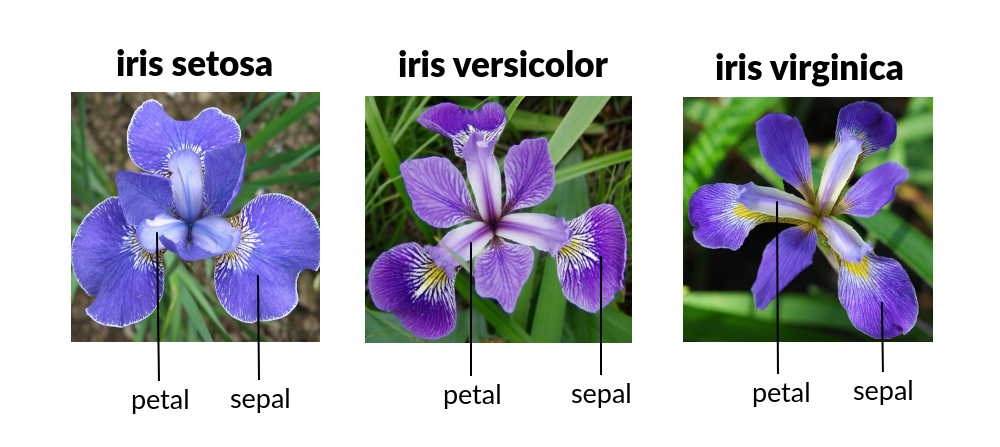
Source: https://medium.com/@naidubhavya06/detailed-explanation-of-exploratory-data-analysis-using-iris-dataset-fa8082a4ce0f Fair use claimed.

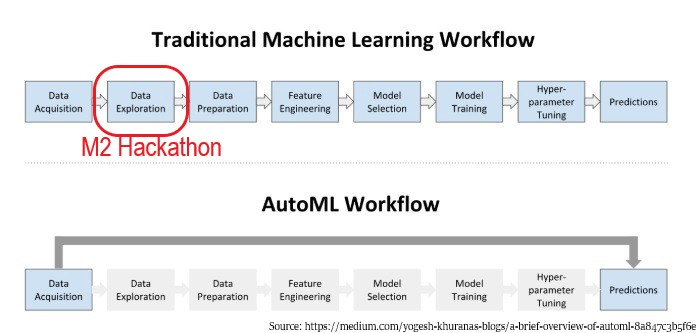

#**Table of Contents**
* Business Problem
* BLUF
* Libraries
* Data
* Missing Values
* Duplicates
* Descriptive Statistics
* Interactive Visualizations
* Automated Visualizations
* Conclusions

#**Business Problem**
We want to explore the iris dataset with a view to a) identifying data preparation needs for development of a machine learning classifier that can classify any of the iris species in a dataset containing instances of all three species, and b) form inferences about relationships between the features and identify possible strong predictors of iris species.

#**BLUF** 
(Bottom Line Up Front)

This is a tiny dataset with 150 instances, There are 50 instances of each species of iris and four predictors. There are no missing values and three duplicates. Predictors roughly normal, and skewness correction/transformation is not required. There are no outliers. The target variable has to be dummy encoded. *Iris setosa* is easier to classify than the other two species of iris.

#**Libraries**

In [ ]:
# Basic libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install --upgrade plotly   # you may need to pip install plotly
!pip install jupyter-dash       # you may need to install jupyter-dash

import plotly.graph_objects as go
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output 

In [ ]:
!pip install sweetviz     # You may need to pip install sweetviz
import sweetviz as sv

In [ ]:
# !pip install autoviz    # Installs AutoViz
# #importing Autoviz class
# from autoviz.AutoViz_Class import AutoViz_Class#Instantiate the AutoViz class
# AV = AutoViz_Class()

#**Data**

The code below shows how to mount your Google Drive on your runtime using an authorization code, and how to write and read files there. This supports reading, writing, and moving files

Alternatively, you could read in the data from a URL.

Data Dictionary: the dataset features four predictors - sepal width and length, and petal width and length (all measured in centimeters (cm)). The target variable is the species type (this is expressed in text).

In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

# Read 
file_ = "drive/My Drive/Colab Notebooks/Big Data ML/New BDML/Data/iris.csv"   # adapt this as needed to the file structure on your Google drive
df = pd.read_csv(file_) # read in csv file

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Examine the data using df.head() or df.tail()
print("HEAD of df\n", df.head(20))
print("\nTAIL of df\n", df.tail())

# Shape of DataFrame
print("\nSHAPE of df\n", df.shape) 



HEAD of df
     sepal_length  sepal_width  petal_length  petal_width species
0            5.1          3.5           1.4          0.2  setosa
1            4.9          3.0           1.4          0.2  setosa
2            4.7          3.2           1.3          0.2  setosa
3            4.6          3.1           1.5          0.2  setosa
4            5.0          3.6           1.4          0.2  setosa
5            5.4          3.9           1.7          0.4  setosa
6            4.6          3.4           1.4          0.3  setosa
7            5.0          3.4           1.5          0.2  setosa
8            4.4          2.9           1.4          0.2  setosa
9            4.9          3.1           1.5          0.1  setosa
10           5.4          3.7           1.5          0.2  setosa
11           4.8          3.4           1.6          0.2  setosa
12           4.8          3.0           1.4          0.1  setosa
13           4.3          3.0           1.1          0.1  setosa
14           

In [ ]:
# Count of instances for each species
df['species'].value_counts()
  

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

#**Missing Values**

Missing values may distort the quality of the learning process in the case of some algorithms. Other algorithnms are less sensitive.

Possible fixs for missing valeus include:
* DO NOTHING.
  * Pros: Easy, doesn’t bias the data set, and some algorithms will be OK (XGBoost, lightGMB)
  * Cons: Some algorithms will be excluded 
* IMPUTE MEDIAN/MEAN VALUES.
  * Pros: Easy and fast.
  * Cons: Doesn’t work well with categorical variables, reduces variance of data, ignores correlations between predictors
* IMPUTE USING MOST FREQUENT or ZERO/CONSTANT VALUE
  * Pros: works OK on categorical variables
  * Cons: Introduces bias, doesn’t factor correlations between predictors
* IMPUTE USING kNN
  * Pros: much better than mean/median
  * Cons: kNN is sensitive to outliers, quality of imputation depends on the data
* IMPUTE BY DEEP LEARNING
  * Pros: high quality imputation
  * Cons: slow
* IMPUTE USING MULTIVARIATE IMPUTATION BY CHAINED EQUATION (MICE)
* IMPUTE BY EXTRAPOLATION/INTERPOLATION
* HOT-DECK IMPUTATION (random substitutions)

An imputer is an algorithm that can be used to replace NaNs (missing values) by the median or some other method. 

See [this](https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779) for some discussion of these ideas.

In [ ]:
# Checks

# Check data types
print(df.info())

# Check for missing values
print('\n\nMissing Values\n',df.isnull().sum(axis=0))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


Missing Values
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


#**Duplicates**
It's important to check for duplicates: they may bias the learning process of many ML algorithms if instances are randomly selected and presented to an algorithm during training. Duplicates, in this process, amount to an instance getting more than one shot at influencing algorithm behavior. Be careful when slicing data! One can go from having no duplicates to suddenly having thousands of duplicates after dropping features (deleting columns).

Guidelines:

Generally, remove duplicates
Duplicates may not impact model quality very much if there are only a small number
Pandas: df = df.drop_duplicates()

In [ ]:
# Check for duplicates
print('\n Duplicates\n',df.duplicated().sum())


 Duplicates
 3


#**Descriptive Statistics**
Descriptive statistics entails the production and interpretation of both visualizations and numerical statistics.
* Numerical univariate statistics: mean, median, mode, trimmed mean, standard deviation, skewness, kurtosis, quartiles, IQR, range, etc.
* Numerical bivariate statistics: correlation, covariance, crosstabs, etc.
* Univariate graphs: box plots, violin plots, bar charts, histograms (i.e., prefer to avoid pie charts!)
* Bivariate & multivariate graphs: scatter plots, line charts, stacked/grouped histograms, stacked/grouped bar charts, side-by-side box plots, parallel coordinate plots, scatterplot matrices (“pairplots”), etc. 

In [ ]:
# Univariate descriptive statistics using pandas

# Ensure the maximum number of columns are displayed in pandas
pd.set_option('display.max_columns', None)

# Univariate numerical statistics using pandas .describe 
print("UNIVARIATE DESCRIPTIVE STAT using pandas\n",df.describe(include='all').T)
print("\n SKEWNESS\n",df.skew())
print("\n FISHER'S KURTOSIS\n",df.kurt())

UNIVARIATE DESCRIPTIVE STAT using pandas
               count unique     top freq      mean       std  min  25%   50%  \
sepal_length  150.0    NaN     NaN  NaN  5.843333  0.828066  4.3  5.1   5.8   
sepal_width   150.0    NaN     NaN  NaN     3.054  0.433594  2.0  2.8   3.0   
petal_length  150.0    NaN     NaN  NaN  3.758667   1.76442  1.0  1.6  4.35   
petal_width   150.0    NaN     NaN  NaN  1.198667  0.763161  0.1  0.3   1.3   
species         150      3  setosa   50       NaN       NaN  NaN  NaN   NaN   

              75%  max  
sepal_length  6.4  7.9  
sepal_width   3.3  4.4  
petal_length  5.1  6.9  
petal_width   1.8  2.5  
species       NaN  NaN  

 SKEWNESS
 sepal_length    0.314911
sepal_width     0.334053
petal_length   -0.274464
petal_width    -0.104997
dtype: float64

 FISHER'S KURTOSIS
 sepal_length   -0.552064
sepal_width     0.290781
petal_length   -1.401921
petal_width    -1.339754
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



CORRELATION MATRIX
               sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000





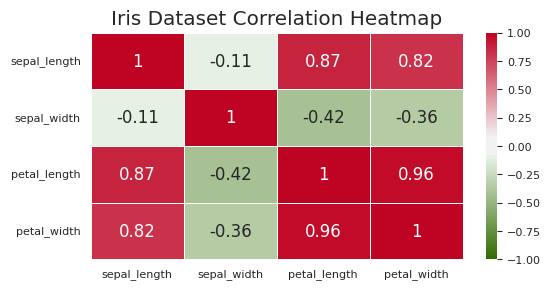



COVARIANCE MATRIX
               sepal_length  sepal_width  petal_length  petal_width
sepal_length      0.685694    -0.039268      1.273682     0.516904
sepal_width      -0.039268     0.188004     -0.321713    -0.117981
petal_length      1.273682    -0.321713      3.113179     1.296387
petal_width       0.516904    -0.117981      1.296387     0.582414





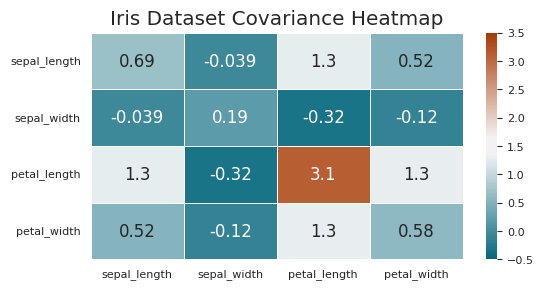

In [ ]:
# Multivariate numerical descriptive statistics

#Correlation Matrix
print("CORRELATION MATRIX\n",df.corr())
print("\n\n")

#Correlation Matrix as a Heatmap
sns.set_style('darkgrid')
plt.figure(figsize = (6,3))
cmap = sns.diverging_palette(120, 10, l = 40, s = 99, sep = 20, center = 'light', as_cmap = True) 
sns.heatmap((df).corr(), vmin = -1, vmax = 1, annot = True, cmap = cmap, lw = .5, linecolor = 'white')
plt.title("Iris Dataset Correlation Heatmap")
plt.show()

# Covariance Matrix
print("\n\nCOVARIANCE MATRIX\n",df.cov())
print("\n\n")

#Covariance Matrix as a Heatmap
sns.set_style('darkgrid')
plt.figure(figsize = (6,3))
cmap = sns.diverging_palette(220, 20, l = 40, s = 99, sep = 20, center = 'light', as_cmap = True) 
sns.heatmap((df).cov(), vmin = -0.5, vmax = 3.5, annot = True, cmap = cmap, lw = .5, linecolor = 'white')
plt.title("Iris Dataset Covariance Heatmap")
plt.show()


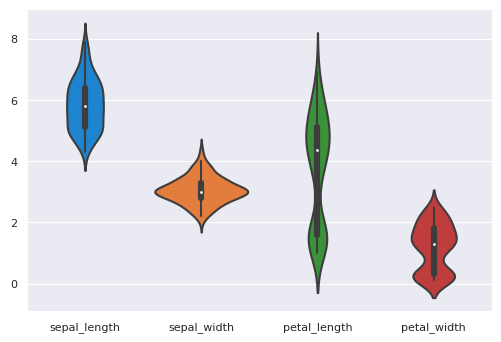

In [ ]:
# Univariate graphical descriptive statistics - violin plots 

# Violin plots
plt.figure(figsize = (6,4))
ax = sns.violinplot(data=df)


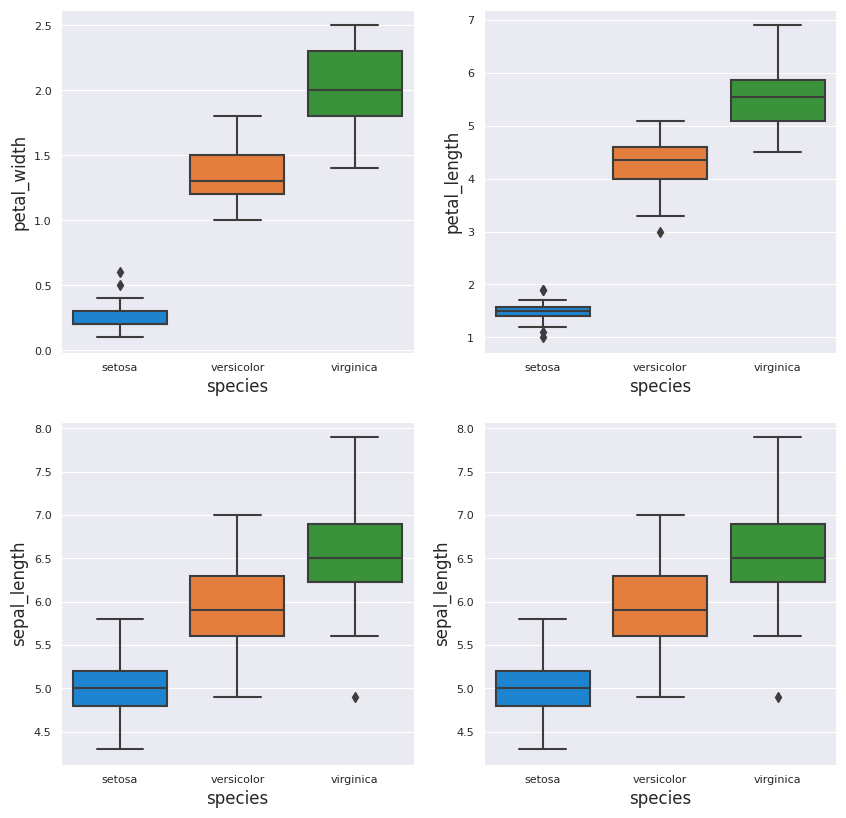

In [ ]:
# Boxplots
fig, axes = plt.subplots(2, 2, figsize=(10,10))
sns.boxplot(  y="petal_width", x= "species", data=df,  orient='v' , ax=axes[0, 0])
sns.boxplot(  y="petal_length", x= "species", data=df,  orient='v' , ax=axes[0, 1])
sns.boxplot(  y="sepal_length", x= "species", data=df,  orient='v' , ax=axes[1, 0])
sns.boxplot(  y="sepal_length", x= "species", data=df,  orient='v' , ax=axes[1, 1])
plt.show()

array([[<AxesSubplot:title={'center':'sepal_length'}>,
        <AxesSubplot:title={'center':'sepal_width'}>],
       [<AxesSubplot:title={'center':'petal_length'}>,
        <AxesSubplot:title={'center':'petal_width'}>]], dtype=object)

<Figure size 600x400 with 0 Axes>

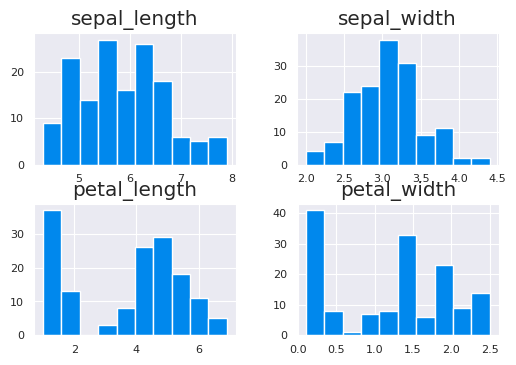

In [ ]:
# Histograms
plt.figure(figsize = (6,4))
df.hist()

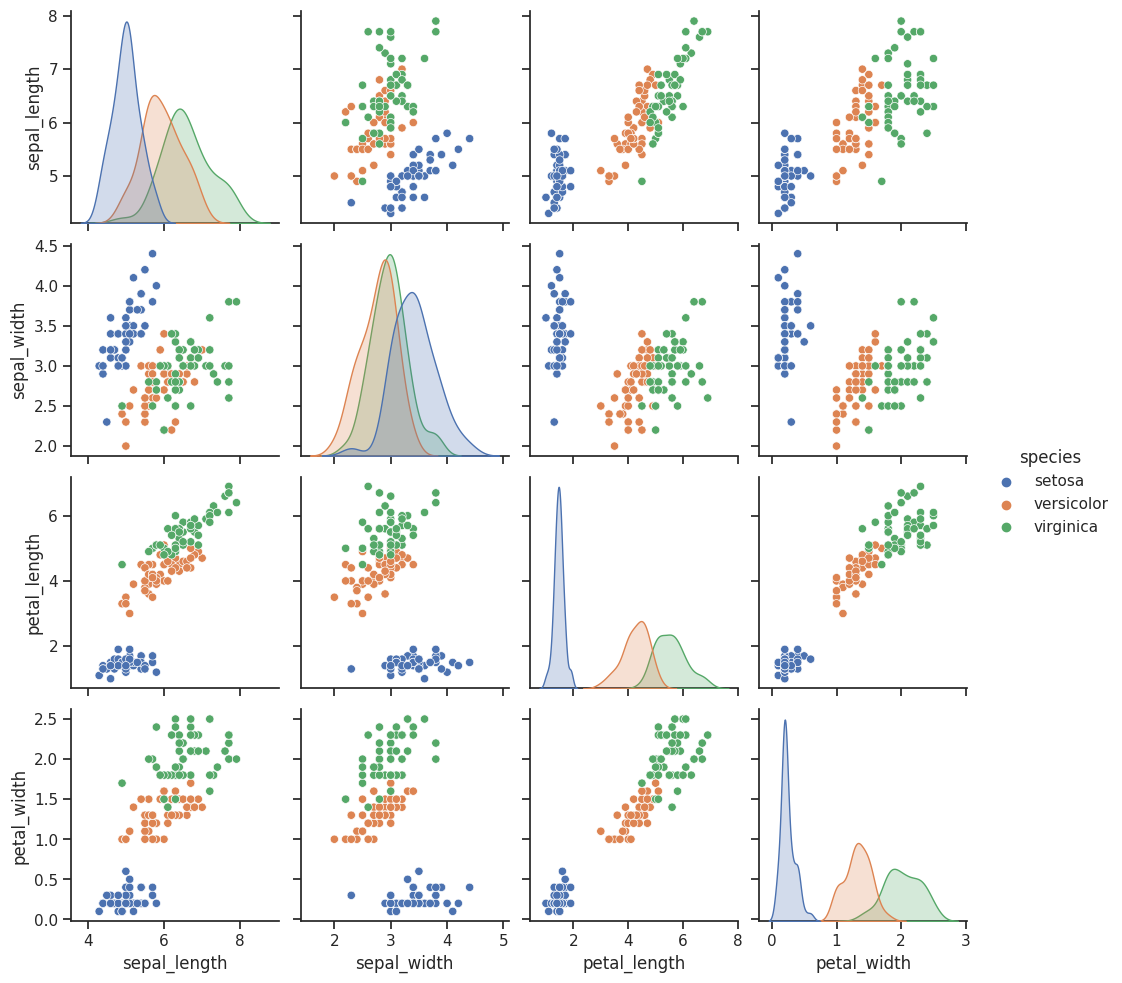

In [ ]:
# Bivariate Graphical Descriptive Statistics
#Scatterplot matrix - these can take some time to gerenerate if the number of featires is large
sns.set_theme(style="ticks")
sns.pairplot(df, hue="species")

<AxesSubplot:>

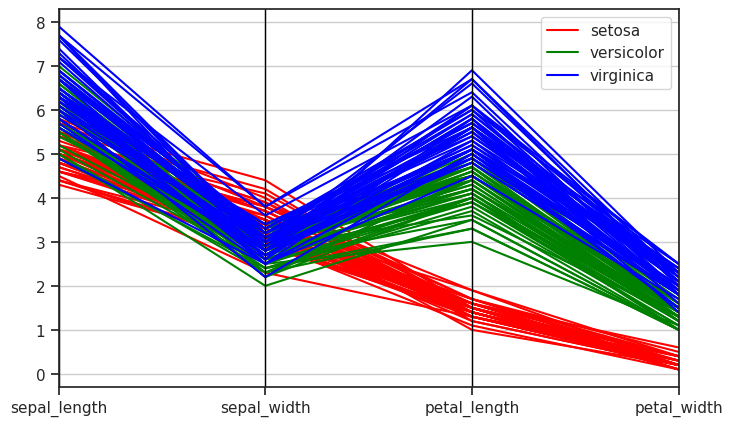

In [ ]:
# Parallel Coordinates Plots
plt.figure(figsize = (8,5))
pd.plotting.parallel_coordinates(
    df, 'species', color=('red', 'green', 'blue'))


#**Interactive Visualizations**

In [ ]:
# Plotly
fig = px.scatter_3d(df, z='petal_length', y='sepal_width', x='sepal_length', color='species', hover_name='species')
# build jupyter dash app 
app = JupyterDash(__name__)
# add html components and figure to app
app.layout = html.Div([dcc.Graph(figure=fig)])
# run app inline
app.run_server(mode='inline') 



<IPython.core.display.Javascript object>

#**Automated Visualizations**

                                             |          | [  0%]   00:00 -> (? left)


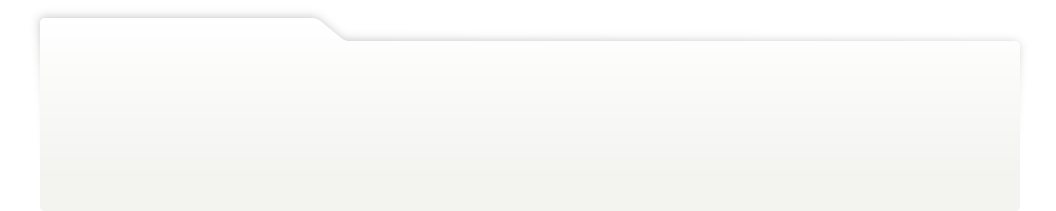
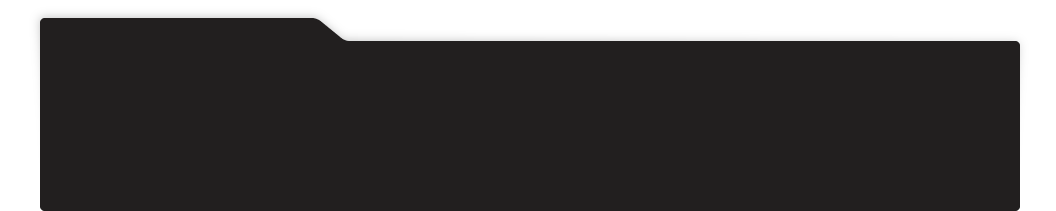
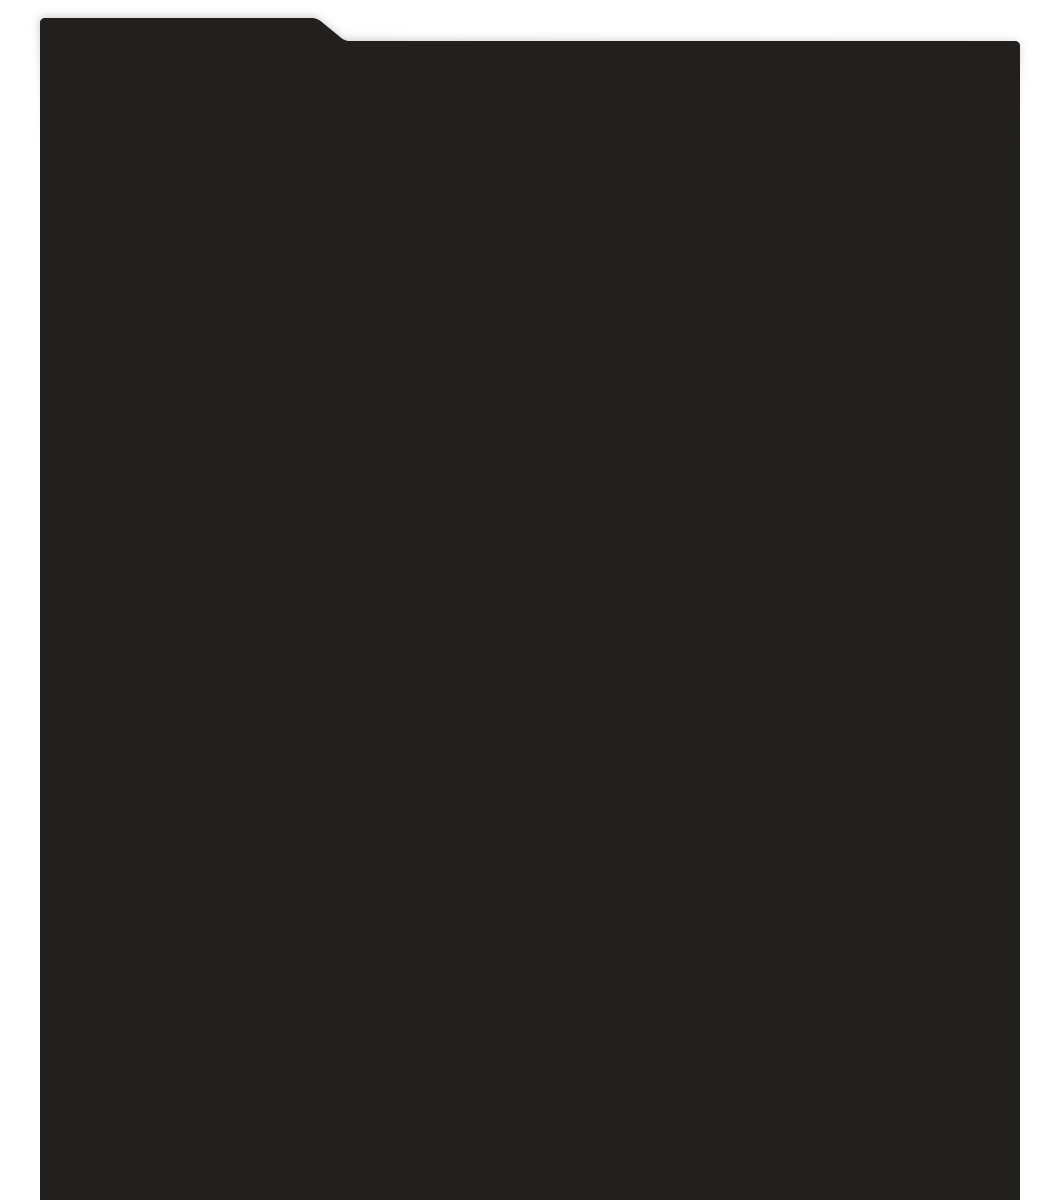
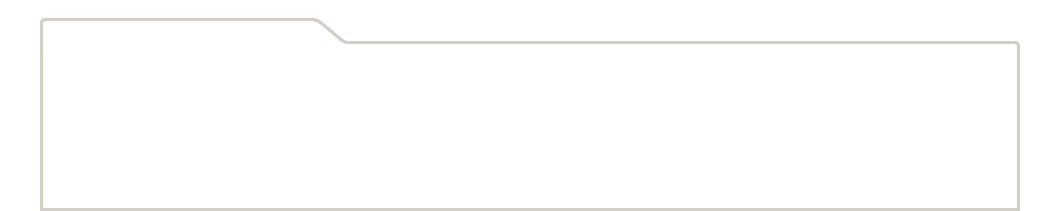
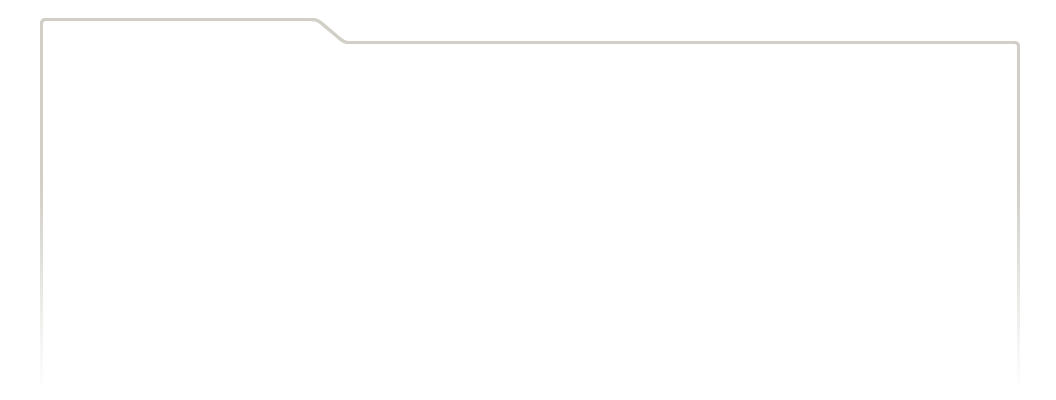
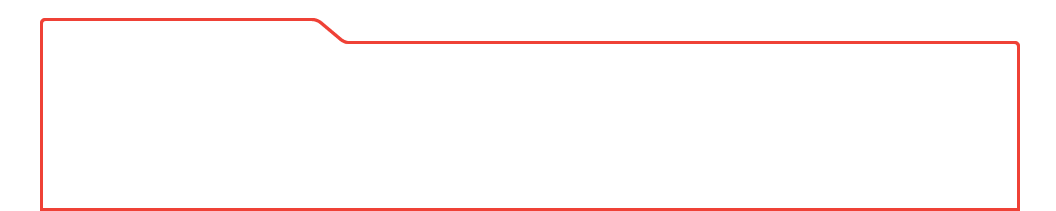
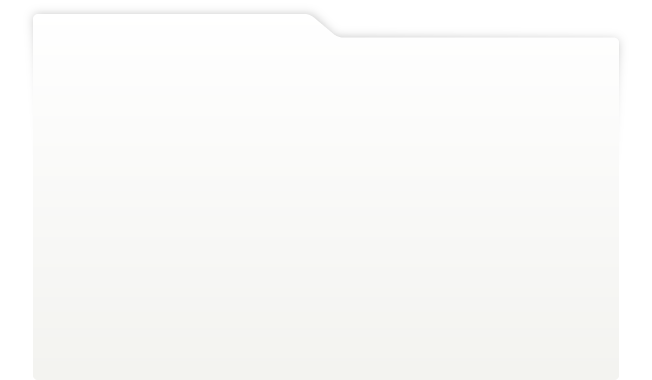
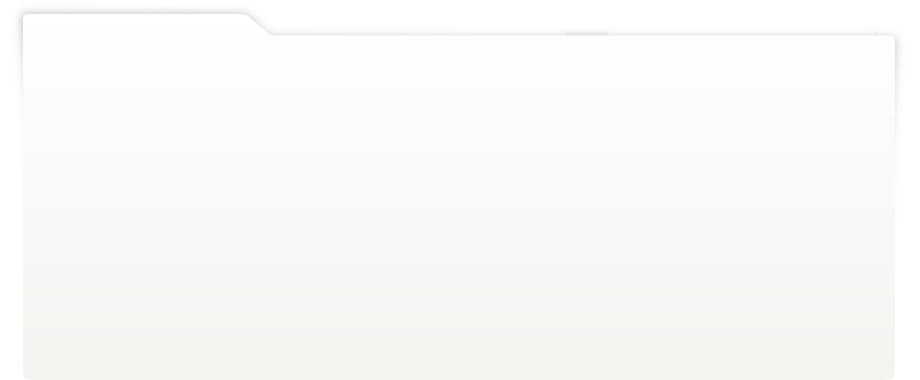
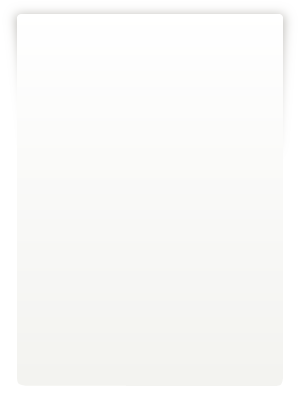
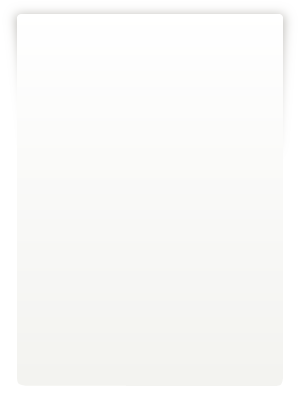
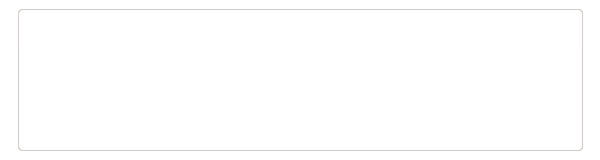
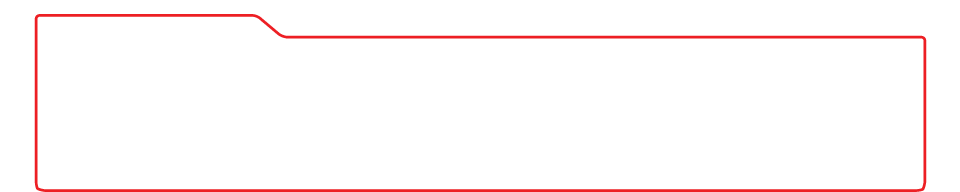
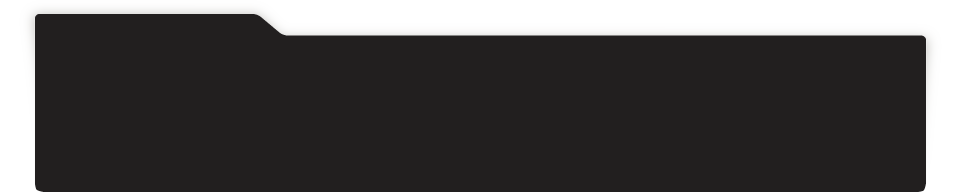
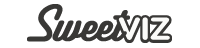
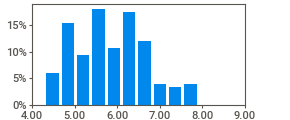
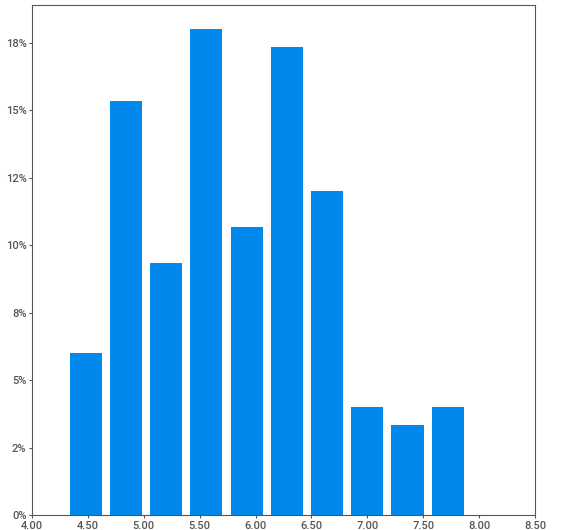
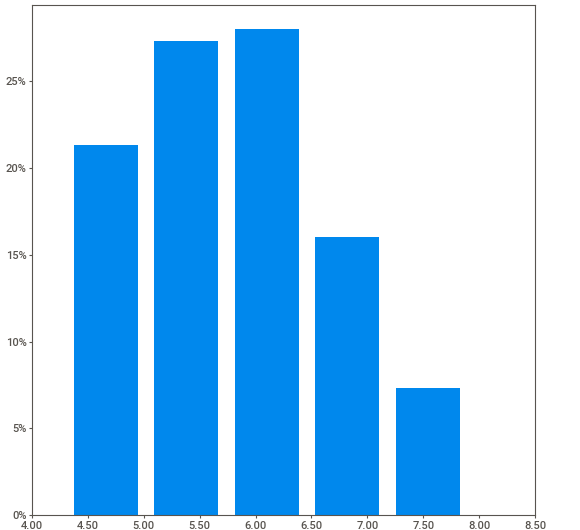
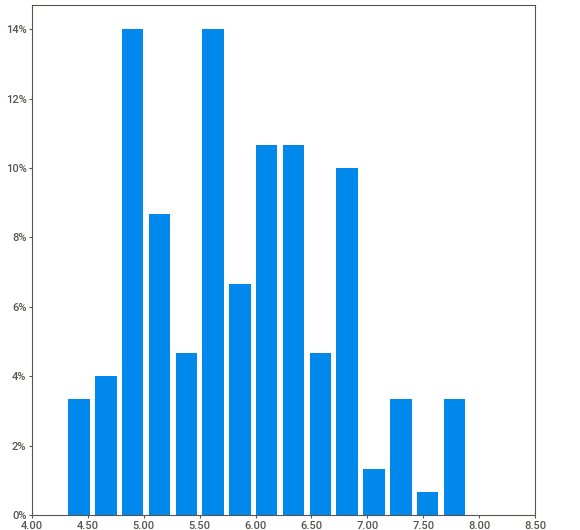
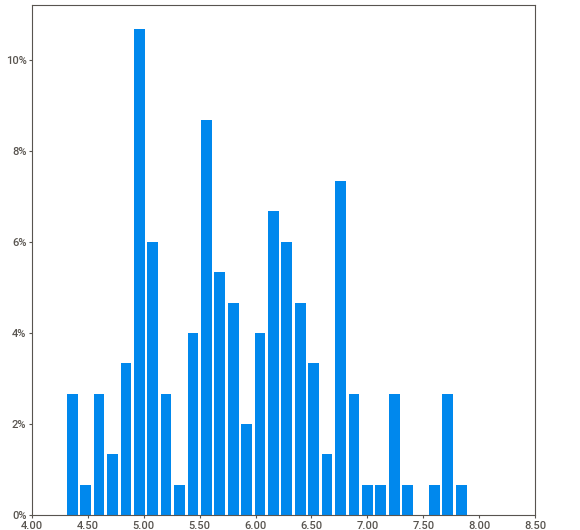
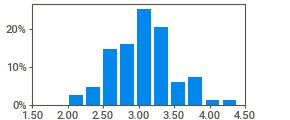
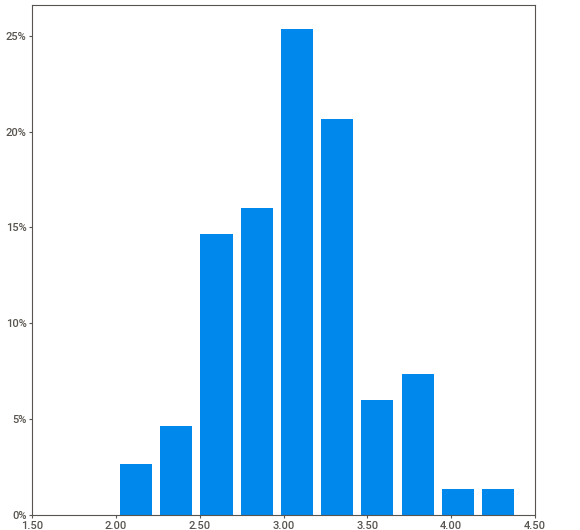
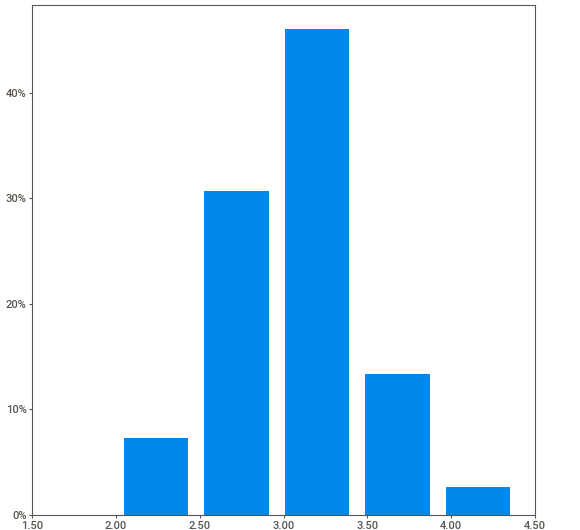
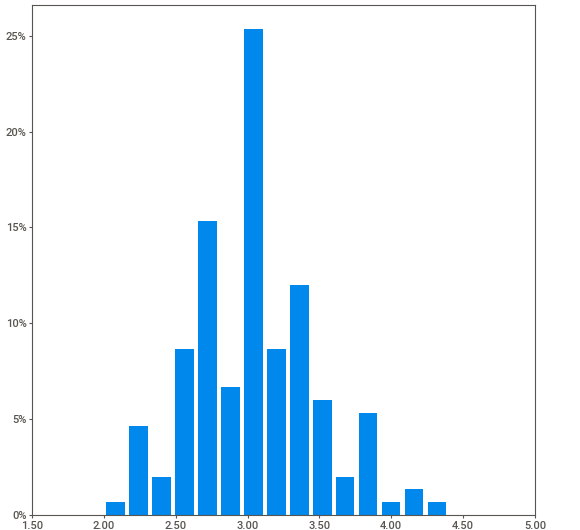
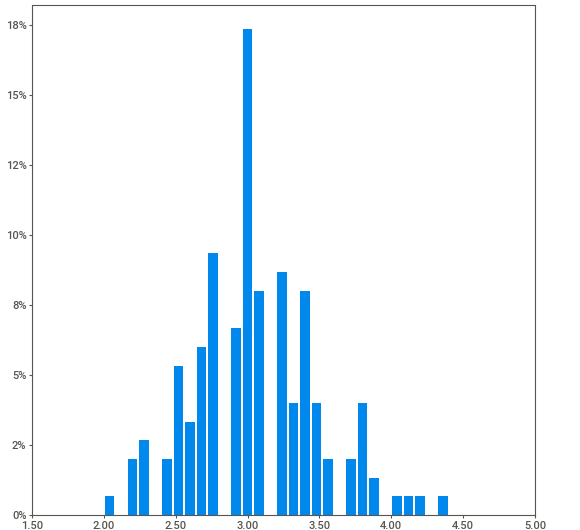
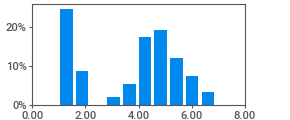
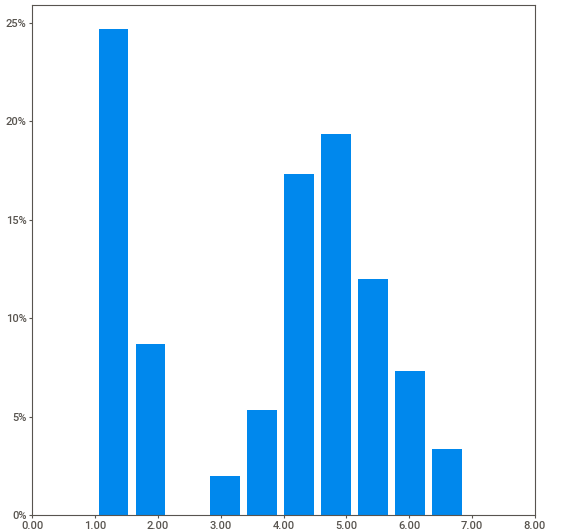
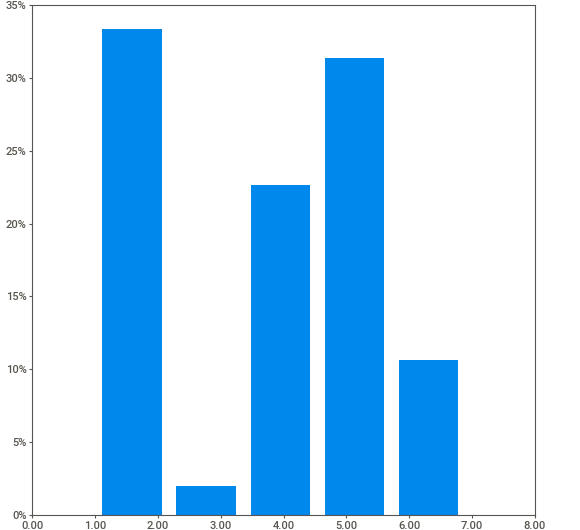
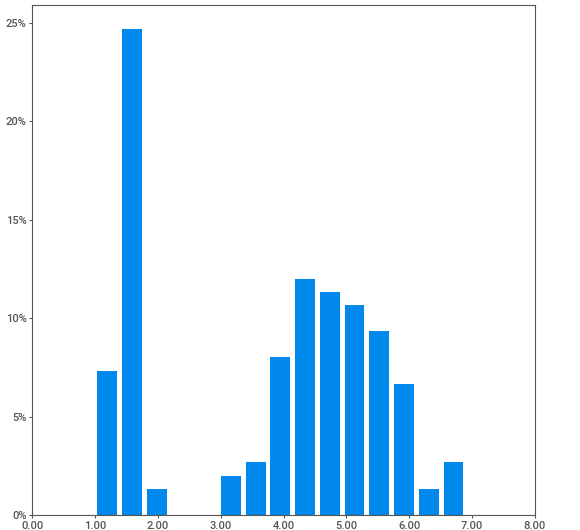
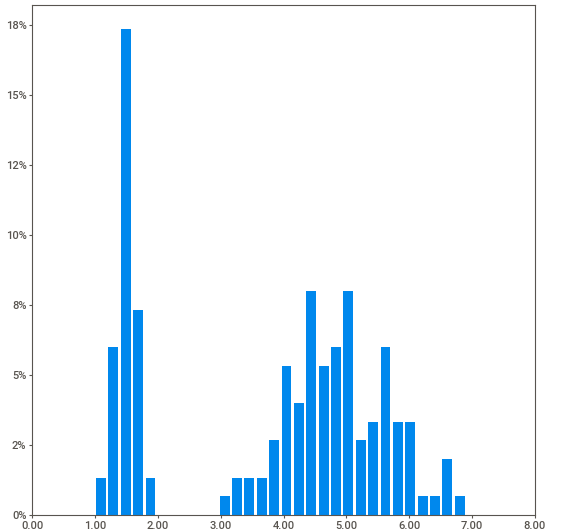
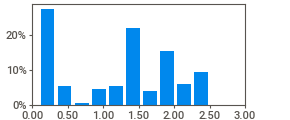
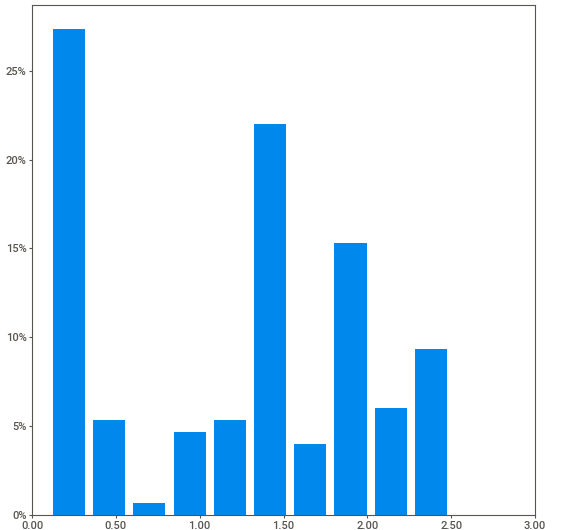
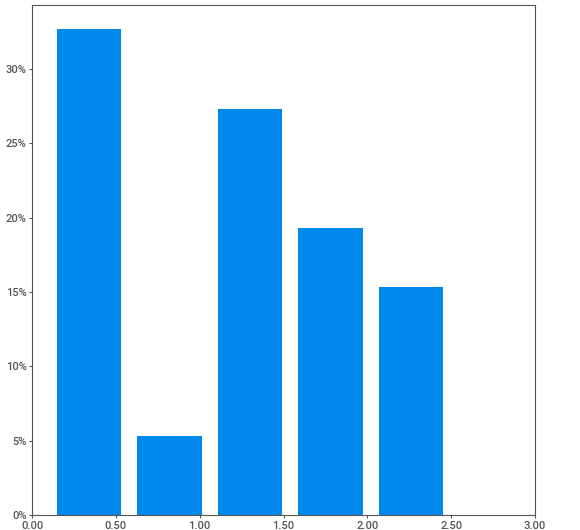
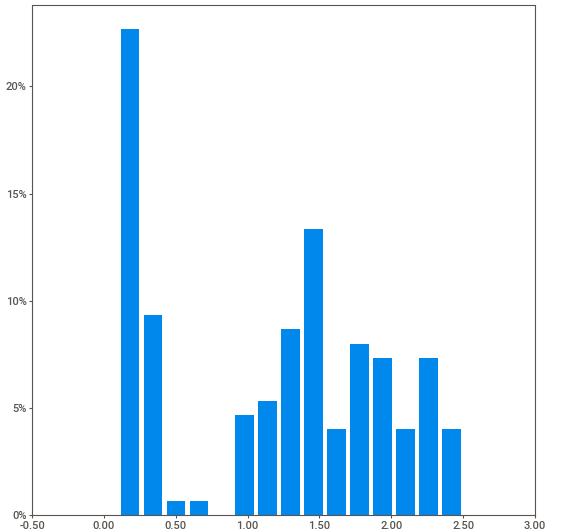
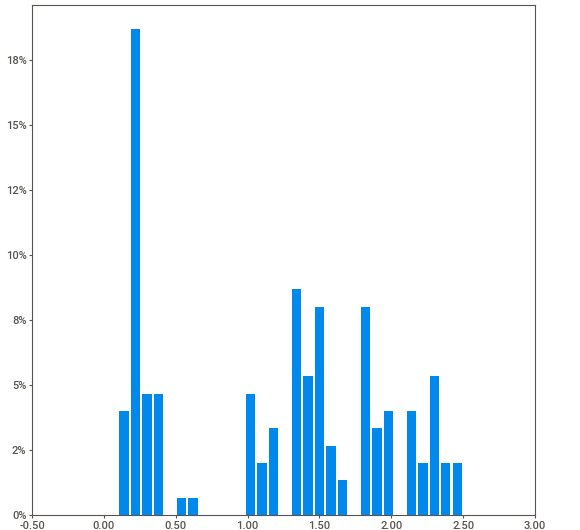
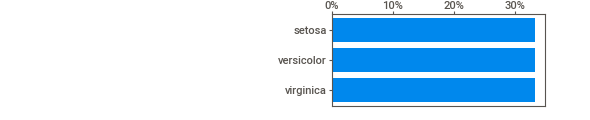
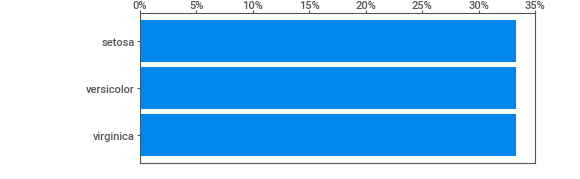
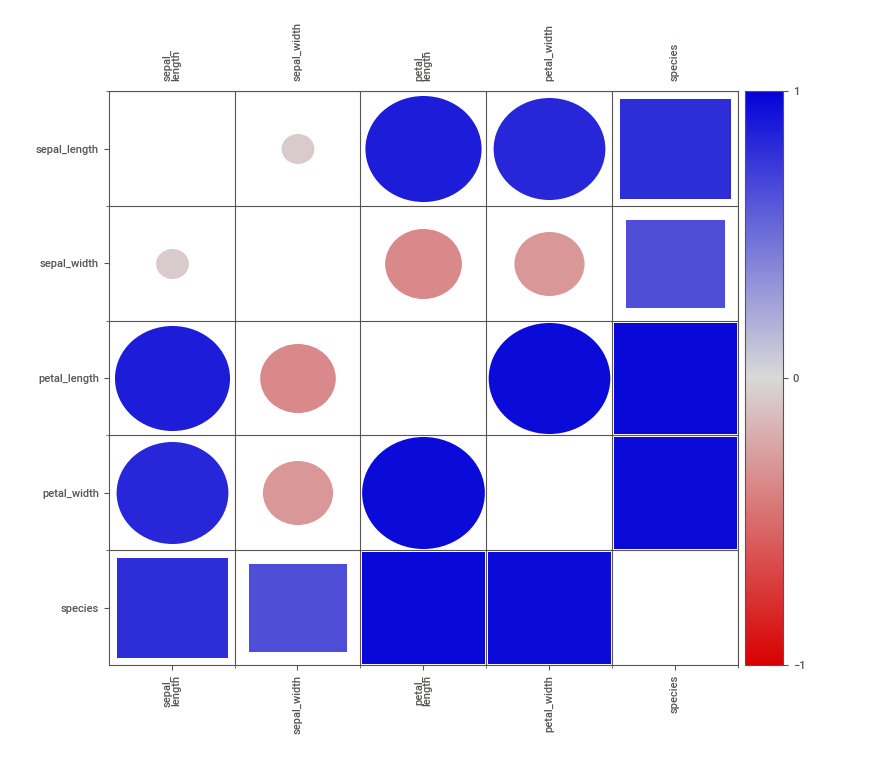
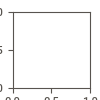

In [ ]:
# Sweetviz as an example of automated visualization

vizreport = sv.analyze(df)           
vizreport.show_notebook(layout='widescreen', w=1500, h=300, scale=0.7) #widescreen layout
#vizreport.show_notebook(layout='vertical', w=800, h=300, scale=0.7)   #vertical layout

In [ ]:
# AutoViz
# sep = ","
# df = AV.AutoViz(file_, depVar = 'species', sep=",", dfte=None, header=0, verbose=0, lowess=False, chart_format="html", max_rows_analyzed=2000, max_cols_analyzed=20,)

#**Conclusions**

Significant takeaways for this dataset for a classification project are as follows: 
1. Identifying *setosa* does not require a ML solution. A simple rule that references petal_length or petal_width will suffice.
2. A classifier to distinguish *versicolor* from *virginica* may not require all predictors (because of the high correlations between most of them).


A long list of detailed observations/inferences from the descriptive statistics can be compiled that could include: 
1. There are 50 instances of *setosa*, followed by 50 instances of *versicolor*, followed by 50 instances of *virginica* in the data set.
2. There are no missing values.
3. There are three duplicate instances.
4. The mean and median of petal_length seem rather different.
5. sepal_width is leptokurtic (heavier tails than the normal). The other predictors are all platykurtic (light tailed).
6. Skewness of all predictors is low (the distributions of all predictors is close to normal).
7. sepal_length, petal_length and petal_width are highly correlated.
8. petal_length has the highest variance of all the predictors.
9. *Setosa* instances are easy to identify in gap histograms, scatterplots and parallel coordinate plots.
10. It is not necessary to develop a classifier to classify *setosa*. A simple rule that references petal_length or petal_width will suffice. Distinguishing *virginica* and *versicolor* is a different matter, but not an insurmountable challenge.
11. *Setosa* has the smallest petal length and petal widths. *Versicolor* has average petal length and petal width. *Virginica* has the highest petal length and petal width.

Data Pre-processing Takeaways

1. No missing values > no imputation required
2. Predictors roughly normal, so no skewness correction/transformation required
3. No outliers
4. Need to one-hot encode the target variable

